# 数据挖掘实践任务

<b>任务描述</b>

- 用逻辑回归、svm和决策树、随机森林和XGBoost进行模型构建，评分方式任意，如准确率等。（不需要考虑模型调参）

In [1]:
# 获取Task2进行特征选择后的数据集
import pandas as pd
dataset = pd.read_csv('./dataset/task2_proc.csv')
features = dataset.iloc[:,:-1]
labels = dataset.iloc[:,-1]
print('feature shape:{}, label shape:{}'.format(features.shape,labels.shape))

feature shape:(4455, 50), label shape:(4455,)


In [2]:
# 数据拆分
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

random_state = 2018
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.3,random_state=random_state)

# 对训练数据集进行标准化处理
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

In [3]:
# 导入库
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,cross_val_predict
from scipy.stats import uniform
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt

In [4]:
def print_score(accuracy,precision,recall,f1,roc_auc):
    print('accuracy_score:', accuracy)
    print('precision_score:', precision)
    print('recall_score:', recall)
    print('f1_score:', f1)
    print('roc_auc_score:', roc_auc)

In [5]:
model_score = []   # 保存个模型的系列评分
decision_score = [] # 保存各模型的决策分数

# 逻辑回归

In [6]:
param_distributions = {'C':uniform(0,10)}
rs_clf = RandomizedSearchCV(LogisticRegression(solver='liblinear'), param_distributions=param_distributions, cv = 3,n_iter=100,
                           random_state=random_state,verbose=2,n_jobs=-1)
rs_clf.fit(x_train_scale,y_train)
logistic = rs_clf.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   11.3s finished


In [7]:
y_pred = logistic.predict(x_test_scale)
y_pred_scores = cross_val_predict(logistic,x_test_scale,y_test,cv=5,
                                method='decision_function')
decision_score.append(y_pred_scores)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred_scores)

model_score.append([accuracy,precision,recall,f1,roc_auc])
print_score(accuracy,precision,recall,f1,roc_auc)

accuracy_score: 0.7913238593866866
precision_score: 0.6243093922651933
recall_score: 0.3487654320987654
f1_score: 0.44752475247524753
roc_auc_score: 0.7840298343753426


# SVM

In [8]:
param_distributions = {'C':uniform(0,10)}
rs_clf = RandomizedSearchCV(SVC(kernel='linear'), param_distributions=param_distributions,cv=3,n_iter=100,
                              random_state=random_state,verbose=2,n_jobs=-1)
rs_clf.fit(x_train_scale, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020636373F60>},
                   pre_dispatch='2*n_jobs', random_state=2018, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [10]:
svc = rs_clf.best_estimator_

y_pred = svc.predict(x_test_scale)
y_pred_scores = cross_val_predict(svc,x_test_scale,y_test,cv=5,
                                method='decision_function')
decision_score.append(y_pred_scores)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred_scores)

model_score.append([accuracy,precision,recall,f1,roc_auc])
print_score(accuracy,precision,recall,f1,roc_auc)

accuracy_score: 0.7905759162303665
precision_score: 0.6964285714285714
recall_score: 0.24074074074074073
f1_score: 0.3577981651376147
roc_auc_score: 0.7879602208328763


# 决策树

In [12]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train_scale,y_train)
y_pred = dt_clf.predict(x_test_scale)
y_pred_scores = cross_val_predict(dt_clf,x_test_scale,y_test,cv=5,
                                method='predict_proba')
decision_score.append(y_pred_scores[:,1])
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred_scores[:,1])

model_score.append([accuracy,precision,recall,f1,roc_auc])
print_score(accuracy,precision,recall,f1,roc_auc)

accuracy_score: 0.712789827973074
precision_score: 0.4175824175824176
recall_score: 0.4691358024691358
f1_score: 0.44186046511627913
roc_auc_score: 0.5770904171693906


# 随机森林

In [14]:
rf_clf = RandomForestClassifier(n_estimators=1000,criterion='gini',oob_score=True,
                               random_state=random_state,verbose=0,n_jobs=-1)
rf_clf.fit(x_train_scale,y_train)
rf_clf.oob_score_

0.7957023733162284

In [15]:
y_pred = rf_clf.predict(x_test_scale)
y_pred_scores = cross_val_predict(rf_clf,x_test_scale,y_test,cv=5,
                                method='predict_proba')
decision_score.append(y_pred_scores[:,1])
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred_scores[:,1])

model_score.append([accuracy,precision,recall,f1,roc_auc])
print_score(accuracy,precision,recall,f1,roc_auc)

accuracy_score: 0.8017950635751683
precision_score: 0.7122302158273381
recall_score: 0.3055555555555556
f1_score: 0.4276457883369331
roc_auc_score: 0.7767647130513206


# xgboost

In [16]:
from xgboost import XGBClassifier
xgbst = XGBClassifier()
xgbst.fit(x_train_scale,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [18]:
y_pred = xgbst.predict(x_test_scale)
y_pred_scores = cross_val_predict(xgbst,x_test_scale,y_test,cv=5,
                                method='predict_proba')
decision_score.append(y_pred_scores[:,1])
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred_scores[:,1])

model_score.append([accuracy,precision,recall,f1,roc_auc])
print_score(accuracy,precision,recall,f1,roc_auc)

accuracy_score: 0.806282722513089
precision_score: 0.7070063694267515
recall_score: 0.3425925925925926
f1_score: 0.4615384615384615
roc_auc_score: 0.7982767235810999


# 对各模型分数进行比较

In [19]:
index = ['Logistic','SVM','DecisionTree','RandomForest','xgboost']
columns = ['accuracy','precision','recall','f1','roc_auc']
model_score_table =  pd.DataFrame(model_score,index=index,columns=columns)
model_score_table

,accuracy,precision,recall,f1,roc_auc
Logistic,0.791324,0.624309,0.348765,0.447525,0.784030
SVM,0.790576,0.696429,0.240741,0.357798,0.787960
DecisionTree,0.712790,0.417582,0.469136,0.441860,0.577090
RandomForest,0.801795,0.712230,0.305556,0.427646,0.776765
xgboost,0.806283,0.707006,0.342593,0.461538,0.798277


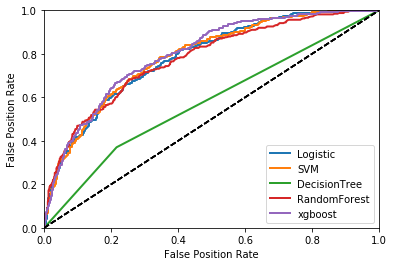

In [20]:
# 绘制ROC取下对比图
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')

for score,label in zip(decision_score,['Logistic','SVM','DecisionTree','RandomForest','xgboost']):
    fpr,tpr,threshold = roc_curve(y_test,score)
    plot_roc_curve(fpr,tpr,label)
plt.rcParams['figure.figsize'] = (8,5)    
plt.axis([0,1,0,1])
plt.xlabel('False Position Rate')
plt.ylabel('False Position Rate')
plt.legend()
plt.show()